<a href="https://colab.research.google.com/github/SahanaTP/Pesticide_Exposure_Detection/blob/main/model/decision_tree_p_rfe_adasyn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import dimension_reduction
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter
from tabulate import tabulate
import eval_metrics
import graphviz
from sklearn import tree
import pydotplus
from sklearn import metrics
import learning_curve
import cross_validation
import pickle
import oversampling

pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('/content/processed_data.csv')

In [5]:
data.head()

,Gender,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,High_Blood_pressure,High_Cholestrol,Chest_pain,stomach problem,Chest Cold,Pneu_flu_ear infection,HIV,Diabetes,Difficulty Hearing,Difficulty Seeing,Hepatitis_B,Hepatitis_C,hospitalized,Weak Kidney,Kidney Stone,Pesticide_used,anemia,overweight,blood_transfusion,arthritis,gout,congestive heart failure,coronary heart disease,heart attack,stroke,emphysema,thyroid,chronic bronchitis,liver problem,COPD,jaundice,cancer,kidney_cancer,Farmer,smoked_in_pregnancy,Prescribed_medicine,HC2,HC3,HC4,HC5,days_hospitalised_1,days_hospitalised_2,days_hospitalised_3,days_hospitalised_4,days_hospitalised_5,days_hospitalised_6,Age,Env_Subsamp_B_wts_x,"2,4-D","3,5,6-trichloropyridinol",4-fluoro-3-phenoxy-benzoic acid,3-phenoxybenzoic acid,Oxypyrimidine,para-Nitrophenol,Dichlorovnl-dimeth prop carboacid,Malathion diacid,Env_Subsamp_B_wts_y,Dimethylphosphate,Diethylphosphate,Dimethylthiophosphate,Diethylthiophosphate,Dimethyldithiophosphate,Diethyldithiophosphate,surplus specimen_B_2y_wts,Imidacloprid,Acetamiprid,Clothianidin,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,surplus specimen_GLYP_2y_wts,Glyphosate,UACR
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,-0.108628,-0.518634,-0.190293,-0.140932,-0.07757,0.543686,1.021701,0.071507,-0.021614,-0.121833,-0.518634,-0.256235,0.382072,-0.290586,-0.082660,-0.227729,-0.119027,-0.495505,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.348441,-0.359301,-0.346669,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,-1.556004,-0.502088,-0.135787,-0.537448,-0.07757,-0.283344,-0.132227,2.774817,-0.183337,-0.121833,-0.502088,-0.381923,0.308823,-0.315169,-0.239351,-0.253029,-0.119027,-0.404546,0.413754,-0.057047,-0.097582,-0.023447,0.241930,0.764528,-0.794029,-0.442560,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,-1.137026,-0.197805,0.022777,-0.245279,-0.07757,1.175124,0.077578,0.071507,0.715355,-0.121833,-0.197805,-0.335284,-0.223603,-0.251700,-0.165348,-0.155442,-0.119027,-0.136210,-0.127305,-0.057047,-0.097582,-0.023447,0.102132,-0.348441,-0.017631,0.043225,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,-1.556004,-0.784983,-0.120921,-0.500927,-0.07757,-0.258703,-0.132227,-0.251571,-0.183337,-0.121833,-0.784983,0.011214,-0.030093,0.180716,0.723454,-0.107733,-0.119027,-0.858739,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.139621,-0.794029,-0.223519,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,-1.594093,-0.785710,-0.185338,-0.819183,-0.07757,-0.263323,-0.132227,-0.508715,-0.183337,-0.121833,-0.785710,-0.416705,-0.450130,-0.283805,-0.239351,-0.253029,-0.119027,-0.858739,-0.127305,-0.057047,-0.097582,-0.023447,-0.163357,-0.139621,-0.794029,-0.223519,0


In [6]:
data.shape

(6221, 81)

In [7]:
data.isna().sum()

Gender                          0
Marital_status                  0
Pregnant                        0
current_drinker                 0
former_drinker_x                0
                               ..
5-Hydroxyimidacloprid           0
N-Desmethylacetamiprid          0
surplus specimen_GLYP_2y_wts    0
Glyphosate                      0
UACR                            0
Length: 81, dtype: int64

In [8]:
y = data['UACR']
X = data.drop(columns=['UACR'])

In [9]:
X.shape, y.shape

((6221, 80), (6221,))

In [10]:
X_os,y_os = oversampling.oversample_data(X, y, method='adasyn', sampling_strategy=0.75)

In [11]:
X_os.shape, y_os.shape

((8995, 80), (8995,))

In [12]:
X_significant = dimension_reduction.get_p_values_significant_features(X_os,y_os)

**************************************************
significant features
**************************************************
                    Feature_name        p-Value
0                          const  2.818268e-118
1                            HC3  8.133714e-109
2                            HC4   5.965526e-80
3                            HC2   2.840419e-74
4                            HC5   2.072809e-45
5            days_hospitalised_1   3.017950e-41
6                   hospitalized   7.256990e-38
7                       Diabetes   2.320239e-37
8            days_hospitalised_2   1.616491e-35
9            days_hospitalised_3   1.556452e-25
10           High_Blood_pressure   1.666787e-24
11                  heart attack   1.760491e-20
12           days_hospitalised_5   1.664182e-18
13              para-Nitrophenol   2.239111e-15
14                        Gender   1.118572e-14
15                   Weak Kidney   1.443934e-14
16                  Kidney Stone   1.681762e-13
17           

In [13]:
X_rfe = dimension_reduction.dim_red_using_rfe(X_significant, y_os, 30)

In [14]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_rfe, y_os, test_size=0.2, random_state=2)

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=2)

In [16]:
print('train data(X_train,y_train) shape: ',X_train.shape, y_train.shape)
print('validation data(X_valid,y_valid) shape: ',X_valid.shape, y_valid.shape)
print('test data(X_test,y_test) shape: ',X_test.shape, y_test.shape)

train data(X_train,y_train) shape:  (5756, 30) (5756,)
validation data(X_valid,y_valid) shape:  (1440, 30) (1440,)
test data(X_test,y_test) shape:  (1799, 30) (1799,)


# **Decision tree baseline model**

Using a fully grown decision tree - It will overfit the data

In [55]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_DT_baseline = model.predict(X_valid)

In [56]:
print('Fully grown tree depth: ',model.get_depth())
print('Fully grown tree number of leaf: ',model.get_n_leaves())

Fully grown tree depth:  23
Fully grown tree number of leaf:  481


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       819
           1       0.92      0.92      0.92       621

    accuracy                           0.93      1440
   macro avg       0.93      0.93      0.93      1440
weighted avg       0.93      0.93      0.93      1440

Confusion Matrix:
 [[772  47]
 [ 47 574]]


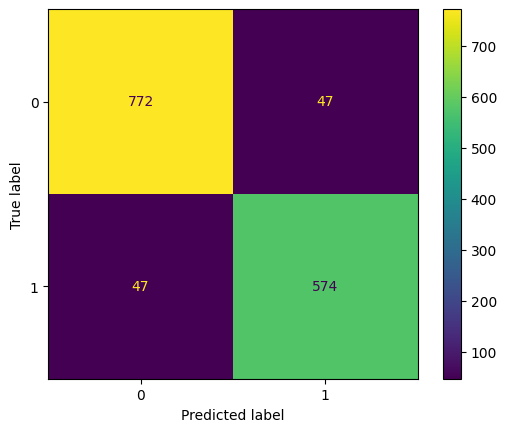

Accuracy: 0.9347222222222222
Precision: 0.9243156199677939
Recall: 0.9243156199677939
Sensitivity: 0.9243156199677939
Specificity: 0.9426129426129426
F1-Score: 0.9243156199677939
Cohen Kappa Score: 0.8669285625807365
G_measure: 0.9243156199677939
Informedness/Youdens statistic: 0.8669285625807364
PPV: 0.9243156199677939
NPV: 0.9426129426129426
Markedness: 0.8669285625807364
Matthews Correlation Coefficient 0.8669285625807365
ROC-AUC Score: 0.9334642812903683


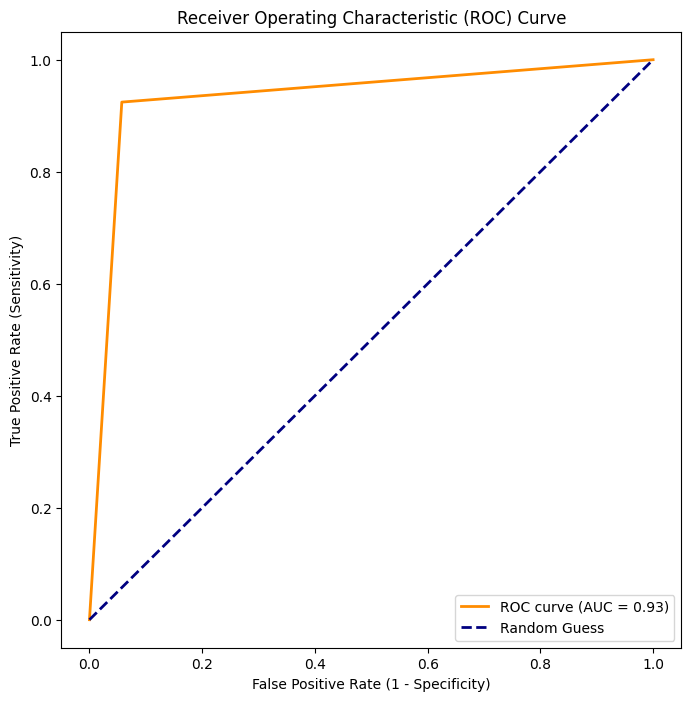

In [57]:
eval_metrics.metrics_calculation(y_valid, y_pred_DT_baseline, True)

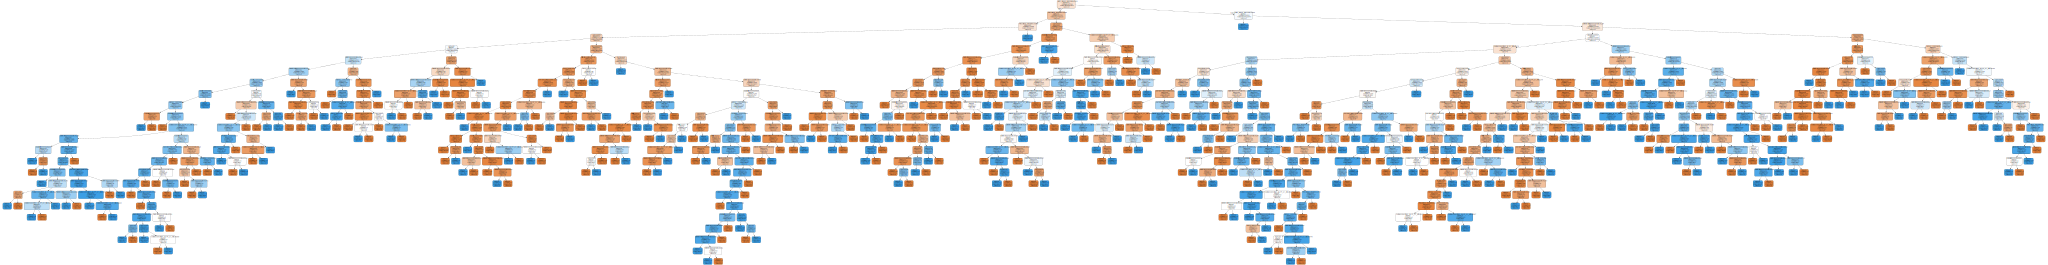

In [58]:
import graphviz
from sklearn import tree
import pydotplus

tree_data = tree.export_graphviz(model, out_file=None,
                                 feature_names=X_train.columns,class_names=['0','1'],
                                 filled=True, rounded=True,
                                 impurity=True, special_characters=True)
graph_tree = graphviz.Source(tree_data)
graph = pydotplus.graph_from_dot_data(tree_data)
graph.write_png('tree.png')
graph_tree

# Hyperparameter tuning

In [60]:
# defining a grid search like function for decision tree to get hyper parameters
def dt_grid_search(max_depth_array, min_s_leaf_array, criterions_array, params, X_train, X_test, y_train, y_test):
  for k in range(0,len(criterions_array)):
    for i in range(0, len(max_depth_array)):
      for j in range(0,len(min_s_leaf_array)):
        max_depth_val = max_depth_array[i]
        min_s_leaf_val = min_s_leaf_array[j]
        criterion_val = criterions_array[k]
        d_tree_clf = DecisionTreeClassifier(max_depth=max_depth_val, min_samples_leaf=min_s_leaf_val, criterion=criterion_val, random_state=2023)#####
        d_tree_clf = d_tree_clf.fit(X_train,y_train)
        y_pred = d_tree_clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        F1_score = metrics.f1_score(y_test, y_pred, average='macro')
        precision = metrics.precision_score(y_test, y_pred, average='macro')
        recall = metrics.recall_score(y_test, y_pred, average='macro')
        parameters_dict = {'criterion':criterion_val, 'max_depth':max_depth_val, 'min_samples_leaf': min_s_leaf_val, 'accuracy': accuracy, 'F1_score':F1_score, 'precision':precision, 'recall':recall}
        params.append(parameters_dict)
        print(f'criterion:{criterion_val}, max_depth:{max_depth_val}, min_samples_leaf:{min_s_leaf_val}, accuracy:{accuracy}, F1_score:{F1_score}')

In [61]:
# lets set the hyperparameters
max_depth_array = [5,8,10]
min_s_leaf_array = [5,10,15]
criterions_array = ['gini','entropy']
params = list()

dt_grid_search(max_depth_array, min_s_leaf_array, criterions_array, params, X_train, X_valid, y_train, y_valid)

criterion:gini, max_depth:5, min_samples_leaf:5, accuracy:0.7375, F1_score:0.7259192420482743
criterion:gini, max_depth:5, min_samples_leaf:10, accuracy:0.7361111111111112, F1_score:0.7243041602260384
criterion:gini, max_depth:5, min_samples_leaf:15, accuracy:0.7361111111111112, F1_score:0.7243041602260384
criterion:gini, max_depth:8, min_samples_leaf:5, accuracy:0.8076388888888889, F1_score:0.8034995485041522
criterion:gini, max_depth:8, min_samples_leaf:10, accuracy:0.7979166666666667, F1_score:0.793482658881197
criterion:gini, max_depth:8, min_samples_leaf:15, accuracy:0.7930555555555555, F1_score:0.7877341691003632
criterion:gini, max_depth:10, min_samples_leaf:5, accuracy:0.8576388888888888, F1_score:0.8557911433681268
criterion:gini, max_depth:10, min_samples_leaf:10, accuracy:0.8444444444444444, F1_score:0.8422979442410589
criterion:gini, max_depth:10, min_samples_leaf:15, accuracy:0.8354166666666667, F1_score:0.8332270478284771
criterion:entropy, max_depth:5, min_samples_leaf:5

In [62]:
# lets sort the metrics in descending order
param_sorted = sorted(params, key=itemgetter('F1_score'), reverse=True)
df = pd.DataFrame.from_dict(param_sorted)
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

# optimal set of hyperparameters will be the top value in the sorted parameter list
opt_hparams = param_sorted[0]
print('**'*60)
print(f'\noptimal hyper-parameters: {opt_hparams}\n')
print('**'*60)

+----+-------------+-------------+--------------------+------------+------------+-------------+----------+
|    | criterion   |   max_depth |   min_samples_leaf |   accuracy |   F1_score |   precision |   recall |
|----+-------------+-------------+--------------------+------------+------------+-------------+----------|
|  0 | gini        |          10 |                  5 |   0.857639 |   0.855791 |    0.854327 | 0.858302 |
|  1 | gini        |          10 |                 10 |   0.844444 |   0.842298 |    0.840988 | 0.844367 |
|  2 | entropy     |          10 |                  5 |   0.838889 |   0.834894 |    0.837114 | 0.833254 |
|  3 | gini        |          10 |                 15 |   0.835417 |   0.833227 |    0.831903 | 0.835457 |
|  4 | entropy     |          10 |                 10 |   0.824306 |   0.820067 |    0.821898 | 0.818681 |
|  5 | entropy     |          10 |                 15 |   0.820833 |   0.816551 |    0.818268 | 0.81524  |
|  6 | gini        |           8 |   

# Cross validation

In [63]:
# using the optimal hyperparameters test the model robustness using k-fold cross validation
model_tuned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, criterion='gini', random_state=2023)
model_tuned.fit(X_train_full, y_train_full)
cross_validation.cross_validation_func(model_tuned, X_train_full, y_train_full, 5)

{'Mean Train Accuracy': 0.8769109618251244,
 'Mean Train Precision': 0.8577063827532256,
 'Mean Train Recall': 0.8584307910385816,
 'Mean Train F1 Score': 0.8575968285174117,
 'Mean Valid Accuracy': 83.22674889969888,
 'Mean Valid Precision': 0.7999399586230883,
 'Mean Valid Recall': 0.8169221927085761,
 'Mean Valid F1 Score': 0.8079305252357649}

# Testing Decision Tree with optimal hyperparameters on unseen data

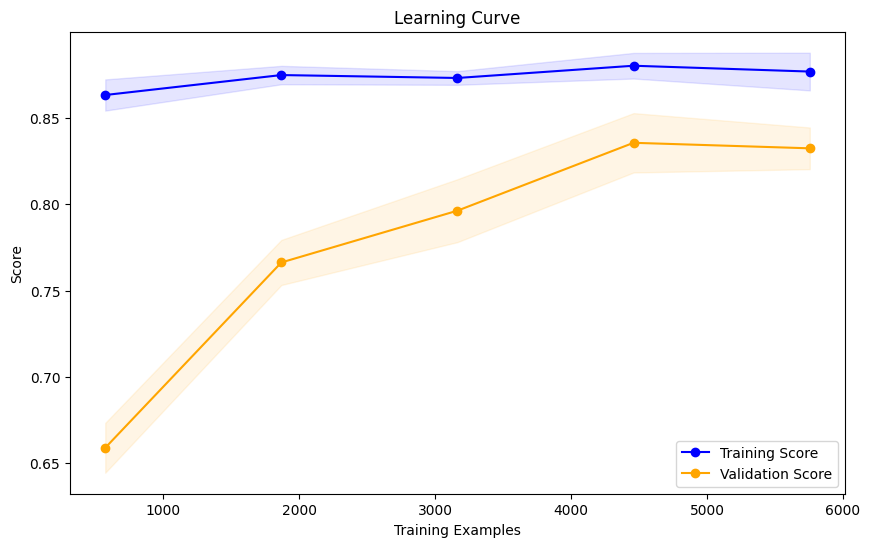

In [64]:
model_opt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, criterion='gini', random_state=2023)
model_opt.fit(X_train_full, y_train_full)
y_pred_DT_opt = model_opt.predict(X_test)
learning_curve.plot_learning_curve(model_opt, X_train_full, y_train_full, cv=5)

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      1022
           1       0.82      0.90      0.86       777

    accuracy                           0.87      1799
   macro avg       0.87      0.87      0.87      1799
weighted avg       0.87      0.87      0.87      1799

Confusion Matrix:
 [[868 154]
 [ 81 696]]


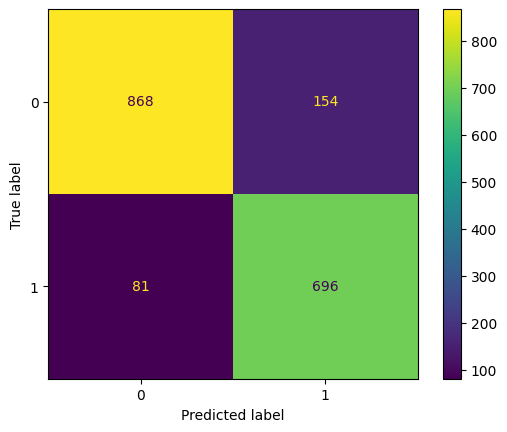

Accuracy: 0.8693718732629239
Precision: 0.8188235294117647
Recall: 0.8957528957528957
Sensitivity: 0.8957528957528957
Specificity: 0.8493150684931506
F1-Score: 0.8555623847572219
Cohen Kappa Score: 0.7367709935974267
G_measure: 0.8555623847572219
Informedness/Youdens statistic: 0.7450679642460463
PPV: 0.8188235294117647
NPV: 0.9146469968387777
Markedness: 0.7334705262505423
Matthews Correlation Coefficient 0.7392465027499068
ROC-AUC Score: 0.8725339821230232


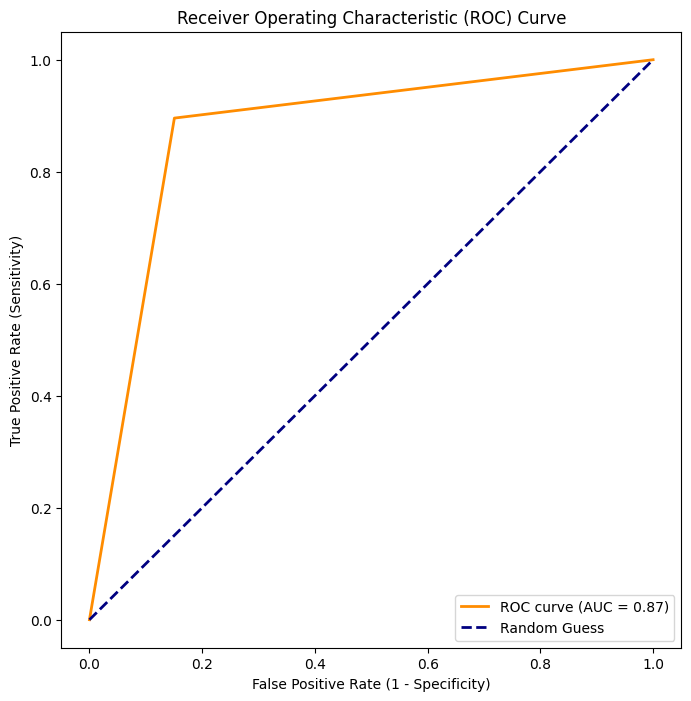

In [65]:
eval_metrics.metrics_calculation(y_test, y_pred_DT_opt, True)

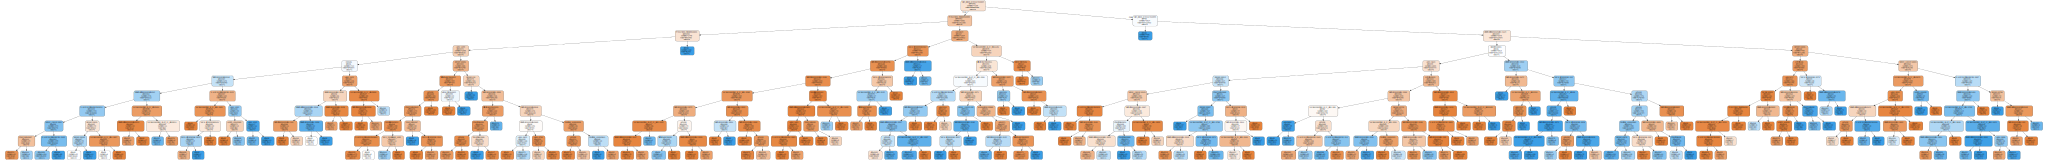

In [66]:
opt_tree_data = tree.export_graphviz(model_opt, out_file=None,
                                 feature_names=X_train.columns,class_names=['0','1'],
                                 filled=True, rounded=True,
                                 impurity=True, special_characters=True)
opt_graph_tree = graphviz.Source(opt_tree_data)
opt_graph = pydotplus.graph_from_dot_data(opt_tree_data)
opt_graph.write_png('tree_opt.png')
opt_graph_tree

In [67]:
filename = 'dt_opt_p_rfe_adasyn_model_.sav'
pickle.dump(model_opt, open(filename, 'wb'))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      1022
           1       0.82      0.90      0.86       777

    accuracy                           0.87      1799
   macro avg       0.87      0.87      0.87      1799
weighted avg       0.87      0.87      0.87      1799

Confusion Matrix:
 [[868 154]
 [ 81 696]]


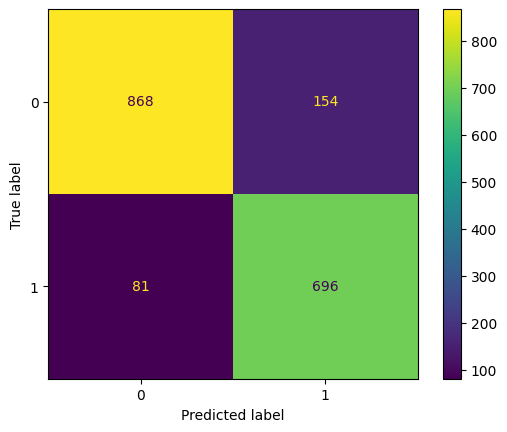

Accuracy: 0.8693718732629239
Precision: 0.8188235294117647
Recall: 0.8957528957528957
Sensitivity: 0.8957528957528957
Specificity: 0.8493150684931506
F1-Score: 0.8555623847572219
Cohen Kappa Score: 0.7367709935974267
G_measure: 0.8555623847572219
Informedness/Youdens statistic: 0.7450679642460463
PPV: 0.8188235294117647
NPV: 0.9146469968387777
Markedness: 0.7334705262505423
Matthews Correlation Coefficient 0.7392465027499068
ROC-AUC Score: 0.8725339821230232


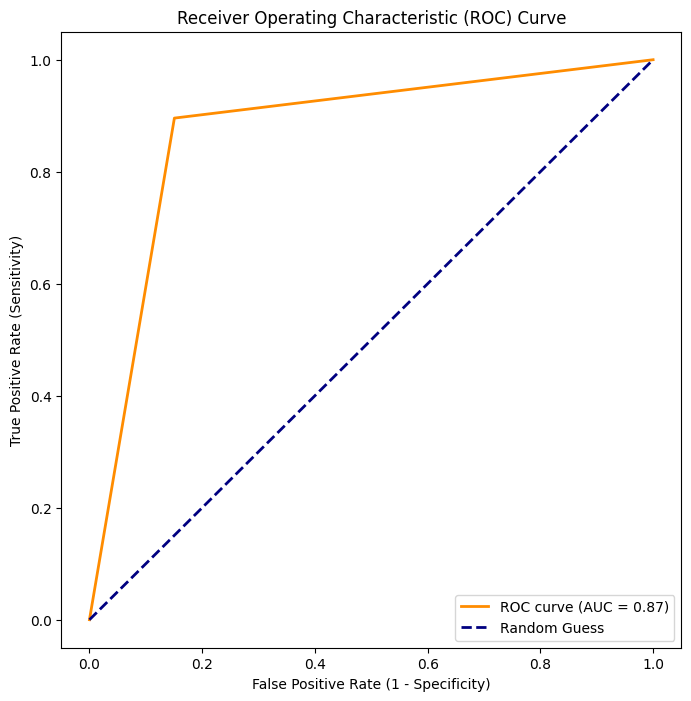

In [68]:
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
eval_metrics.metrics_calculation(y_test, y_pred, True)